In [1]:
import numpy as np
private_labels=np.load("private_labels.npy")
private_pixels=np.load("private_pixels.npy")
public_labels=np.load("public_labels.npy")
public_pixels=np.load("public_pixels.npy")
train_labels=np.load("train_labels.npy")
train_pixels=np.load("train_pixels.npy")

In [2]:
X_train , y_train = train_pixels,train_labels
X_valid , y_valid = public_pixels,public_labels
X_test , y_test = private_pixels,private_labels

In [3]:
print('훈련 세트: ', X_train.shape, y_train.shape)
print('검증 세트: ', X_valid.shape, y_valid.shape)
print('테스트 세트: ', X_test.shape, y_test.shape)

훈련 세트:  (28709, 48, 48, 1) (28709, 7)
검증 세트:  (3589, 48, 48, 1) (3589, 7)
테스트 세트:  (3589, 48, 48, 1) (3589, 7)


In [4]:
mean_vals = np.mean(X_train, axis=0)
std_val = np.std(X_train)

X_train_centered = (X_train - mean_vals)/std_val
X_valid_centered = (X_valid - mean_vals)/std_val
X_test_centered = (X_test - mean_vals)/std_val

In [5]:
X_train_centered.shape

(28709, 48, 48, 1)

In [6]:
y_train_onehot = y_train
y_valid_onehot = y_valid
y_test_onehot =y_test

In [7]:
print(y_train[0], y_train_onehot[0])

[1. 0. 0. 0. 0. 0. 0.] [1. 0. 0. 0. 0. 0. 0.]


In [8]:
print('훈련 세트: ', X_train_centered.shape, y_train_onehot.shape)
print('검증 세트: ', X_valid_centered.shape, y_valid_onehot.shape)
print('테스트 세트: ', X_test_centered.shape, y_test_onehot.shape)

훈련 세트:  (28709, 48, 48, 1) (28709, 7)
검증 세트:  (3589, 48, 48, 1) (3589, 7)
테스트 세트:  (3589, 48, 48, 1) (3589, 7)


In [9]:
from tensorflow.keras import layers, models

In [10]:
model = models.Sequential()

In [11]:
model.add(layers.Conv2D(32, (3, 3), padding='valid', 
                        activation='relu', input_shape=(48, 48, 1)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='valid', 
                        activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='valid', 
                        activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

In [13]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['acc'])

In [14]:
import time
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

callback_list = [ModelCheckpoint(filepath='cnn_checkpoint.h5', 
                                 monitor='val_loss', 
                                 save_best_only=True), 
                 TensorBoard(log_dir="logs/{}".format(time.asctime()))]

In [15]:
history = model.fit(X_train_centered, y_train_onehot, 
                    batch_size=64, epochs=20, 
                    validation_data=(X_valid_centered, y_valid_onehot),
                    callbacks=callback_list)

Epoch 1/20
449/449 [==============================] - 5s 4ms/step - loss: 1.6684 - acc: 0.3365 - val_loss: 1.3570 - val_acc: 0.4829
Epoch 2/20
449/449 [==============================] - 1s 3ms/step - loss: 1.3130 - acc: 0.4990 - val_loss: 1.2644 - val_acc: 0.5146
Epoch 3/20
449/449 [==============================] - 1s 3ms/step - loss: 1.1878 - acc: 0.5497 - val_loss: 1.2148 - val_acc: 0.5419
Epoch 4/20
449/449 [==============================] - 1s 3ms/step - loss: 1.0828 - acc: 0.5948 - val_loss: 1.1885 - val_acc: 0.5511
Epoch 5/20
449/449 [==============================] - 1s 3ms/step - loss: 0.9998 - acc: 0.6252 - val_loss: 1.1642 - val_acc: 0.5626
Epoch 6/20
449/449 [==============================] - 1s 3ms/step - loss: 0.9171 - acc: 0.6575 - val_loss: 1.1783 - val_acc: 0.5731
Epoch 7/20
449/449 [==============================] - 1s 3ms/step - loss: 0.8073 - acc: 0.7009 - val_loss: 1.1956 - val_acc: 0.5832
Epoch 8/20
449/449 [==============================] - 1s 3ms/step - loss: 0.

In [16]:
import matplotlib.pyplot as plt

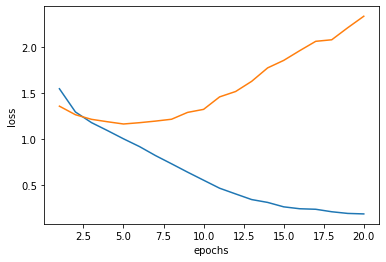

In [17]:
epochs = np.arange(1, 21)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

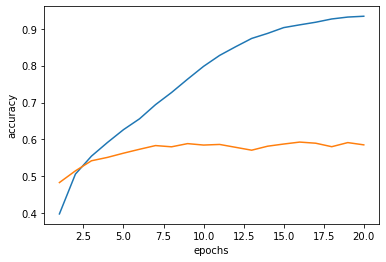

In [18]:
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [19]:
!ls -al logs/

합계 12
drwxr-xr-x 3 lab lab 4096  6월 11 16:03  .
drwxrwxr-x 4 lab lab 4096  6월 11 16:03  ..
drwxr-xr-x 4 lab lab 4096  6월 11 16:03 'Fri Jun 11 16:03:36 2021'


In [20]:
model.save('cnn_model.h5')

In [21]:
from tensorflow.keras.models import load_model

restored_model = load_model('cnn_model.h5')
restored_model.load_weights('cnn_checkpoint.h5')

In [22]:
restored_model.evaluate(X_test_centered, y_test_onehot)

113/113 [==============================] - 0s 1ms/step - loss: 1.1208 - acc: 0.5676


[1.120823621749878, 0.5675675868988037]

In [23]:
np.argmax(restored_model.predict(X_test_centered[:10]), axis=1)

array([0, 4, 4, 2, 0, 0, 4, 3, 2, 3])

In [24]:
y_test[:10]

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

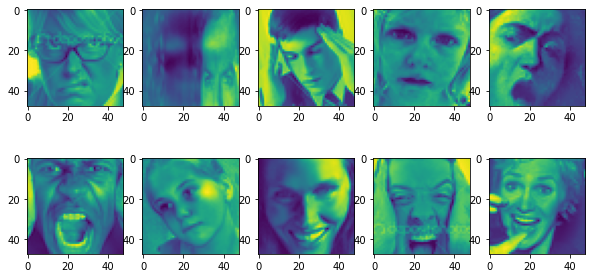

In [25]:
fig = plt.figure(figsize=(10, 5))
for i in range(10):
    fig.add_subplot(2, 5, i+1)
    plt.imshow(X_test_centered[i].reshape(48, 48))

In [26]:
first_layer = model.layers[0]
print(first_layer)

In [27]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [28]:
first_activation = models.Model(inputs=model.input, 
                                outputs=first_layer.output)
activation = first_activation.predict(X_test_centered[:10])

In [29]:
print(activation.shape)

(10, 46, 46, 32)


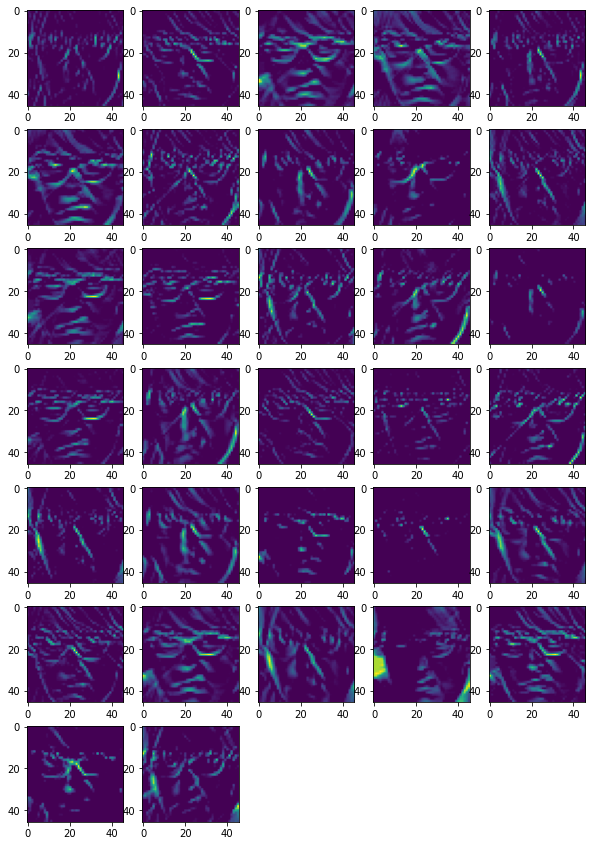

In [30]:
fig = plt.figure(figsize=(10, 15))
for i in range(32):
    fig.add_subplot(7, 5, i+1)
    plt.imshow(activation[0, :, :, i])

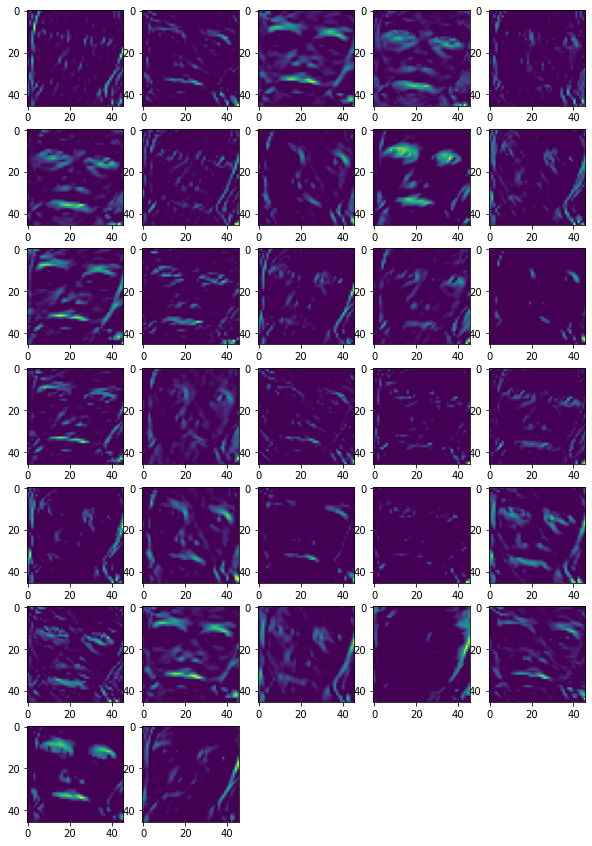

In [31]:
fig = plt.figure(figsize=(10, 15))
for i in range(32):
    fig.add_subplot(7, 5, i+1)
    plt.imshow(activation[3, :, :, i])

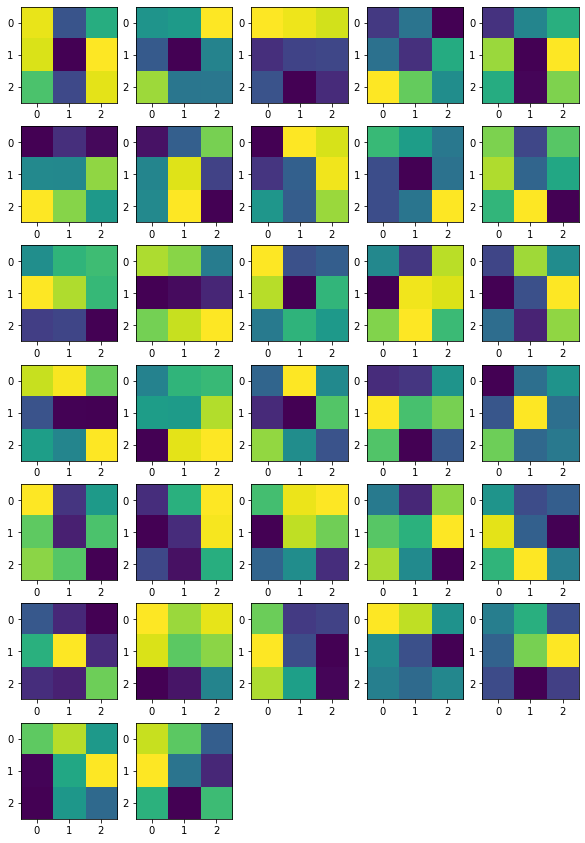

In [32]:
fig = plt.figure(figsize=(10, 15))
for i in range(32):
    fig.add_subplot(7, 5, i+1)
    plt.imshow(first_layer.kernel[:, :, 0, i])